In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import re

In [2]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline

In [3]:
# machine learning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [4]:
train = pd.read_csv('/Users/juhyeon/python-workspace/Spaceship_Titanic/train.csv')
test = pd.read_csv('/Users/juhyeon/python-workspace/Spaceship_Titanic/test.csv')

**train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.**
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

**test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.**


In [5]:
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train.tail(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [7]:
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [8]:
test.tail(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley


In [9]:
print(train.shape)
print(test.shape)

(8693, 14)
(4277, 13)


In [10]:
# train 데이터의 각 항목당 non-null값 확인 (train: 8693개의 데이터)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
# test 데이터의 각 항목당 non-null값 확인 (test: 4277개의 데이터)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [12]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [13]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [14]:
# train 데이터에 있는 column별 category 값 확인.
# PassengerId - 각 승객의 고유 ID. <<< gggg_pp(그룹형식) >>>

print(train.columns.values)

['PassengerId' 'HomePlanet' 'CryoSleep' 'Cabin' 'Destination' 'Age' 'VIP'
 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck' 'Name'
 'Transported']


In [15]:
# HomePlanet - 승객이 출발한 행성, 일반적으로 영주권이 있는 행성.
train['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [16]:
# Destination - 승객이 내릴 행성
train['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [17]:
# VIP - 승객이 특별 VIP 서비스 비용을 지불했는지 여부.
train['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [18]:
# Transported - 승객이 다른 차원으로 이동했는지 여부. 예측하려는 대상(목표)
train['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [19]:
# Cabin - 승객이 머무르는 객실 번호. 
# deck/num/side 의 형식.  <<< ex: G/1496/S >>>
# side: P(Port/좌현), S(Starboard/우현)

train['Cabin'].str[0].value_counts()

Cabin
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [20]:
# CryoSleep - 승객이 항해 기간 동안 활동정지를 선택했는지 여부. 냉동 수면 중인 승객은 객실에 갇혀 있음.
train['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [21]:
# age - 승객의 나이
train['Age'].value_counts()

Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: count, Length: 80, dtype: int64




**EDA**

Text(0.5, 1.0, 'Target Distribution')

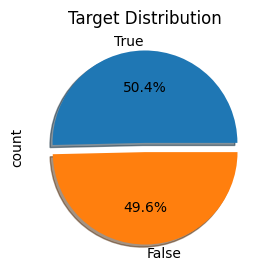

In [24]:
plt.figure(figsize = (3,3))

# Transported - 승객이 다른 차원으로 이동했는지 여부. 예측하려는 대상(목표)
train['Transported'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%', 
                                             shadow=True, textprops={'fontsize':10}).set_title("Target Distribution")

Text(0.5, 0, 'Age (years)')

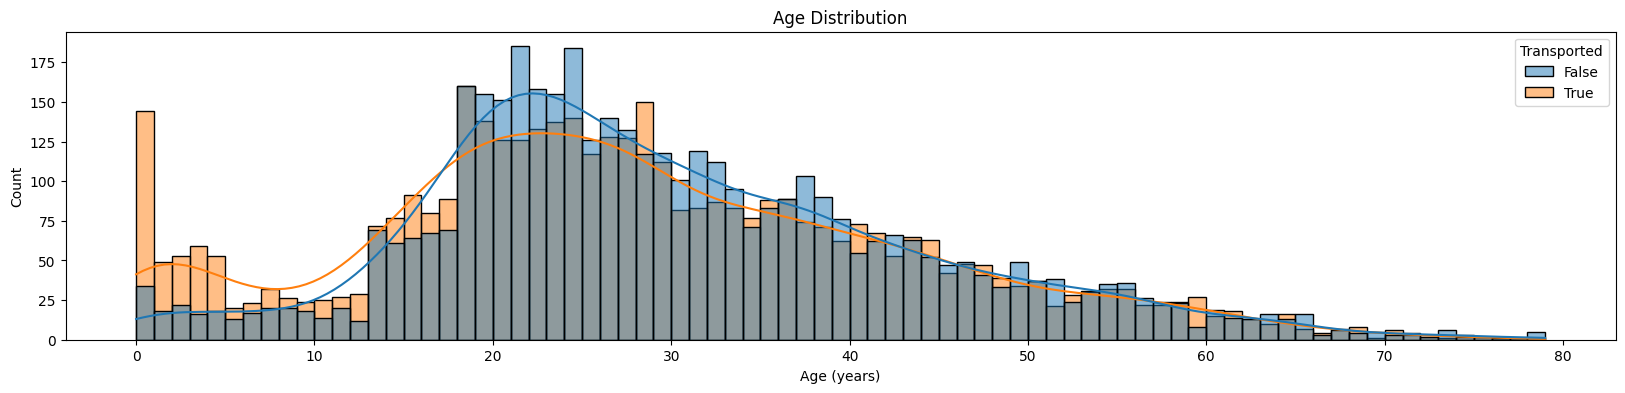

In [27]:
plt.figure(figsize = (20,4))

# <<< histogram >>>
# binwidth = ? : 값의 폭조절
# bins = ? : bin(막대기)의 개수 설정
# kde = True : 곡선형태 만들기

#sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True, bins=80)
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True, bins=80)
plt.title('Age Distribution')
plt.xlabel('Age (years)')

<function matplotlib.pyplot.show(close=None, block=None)>

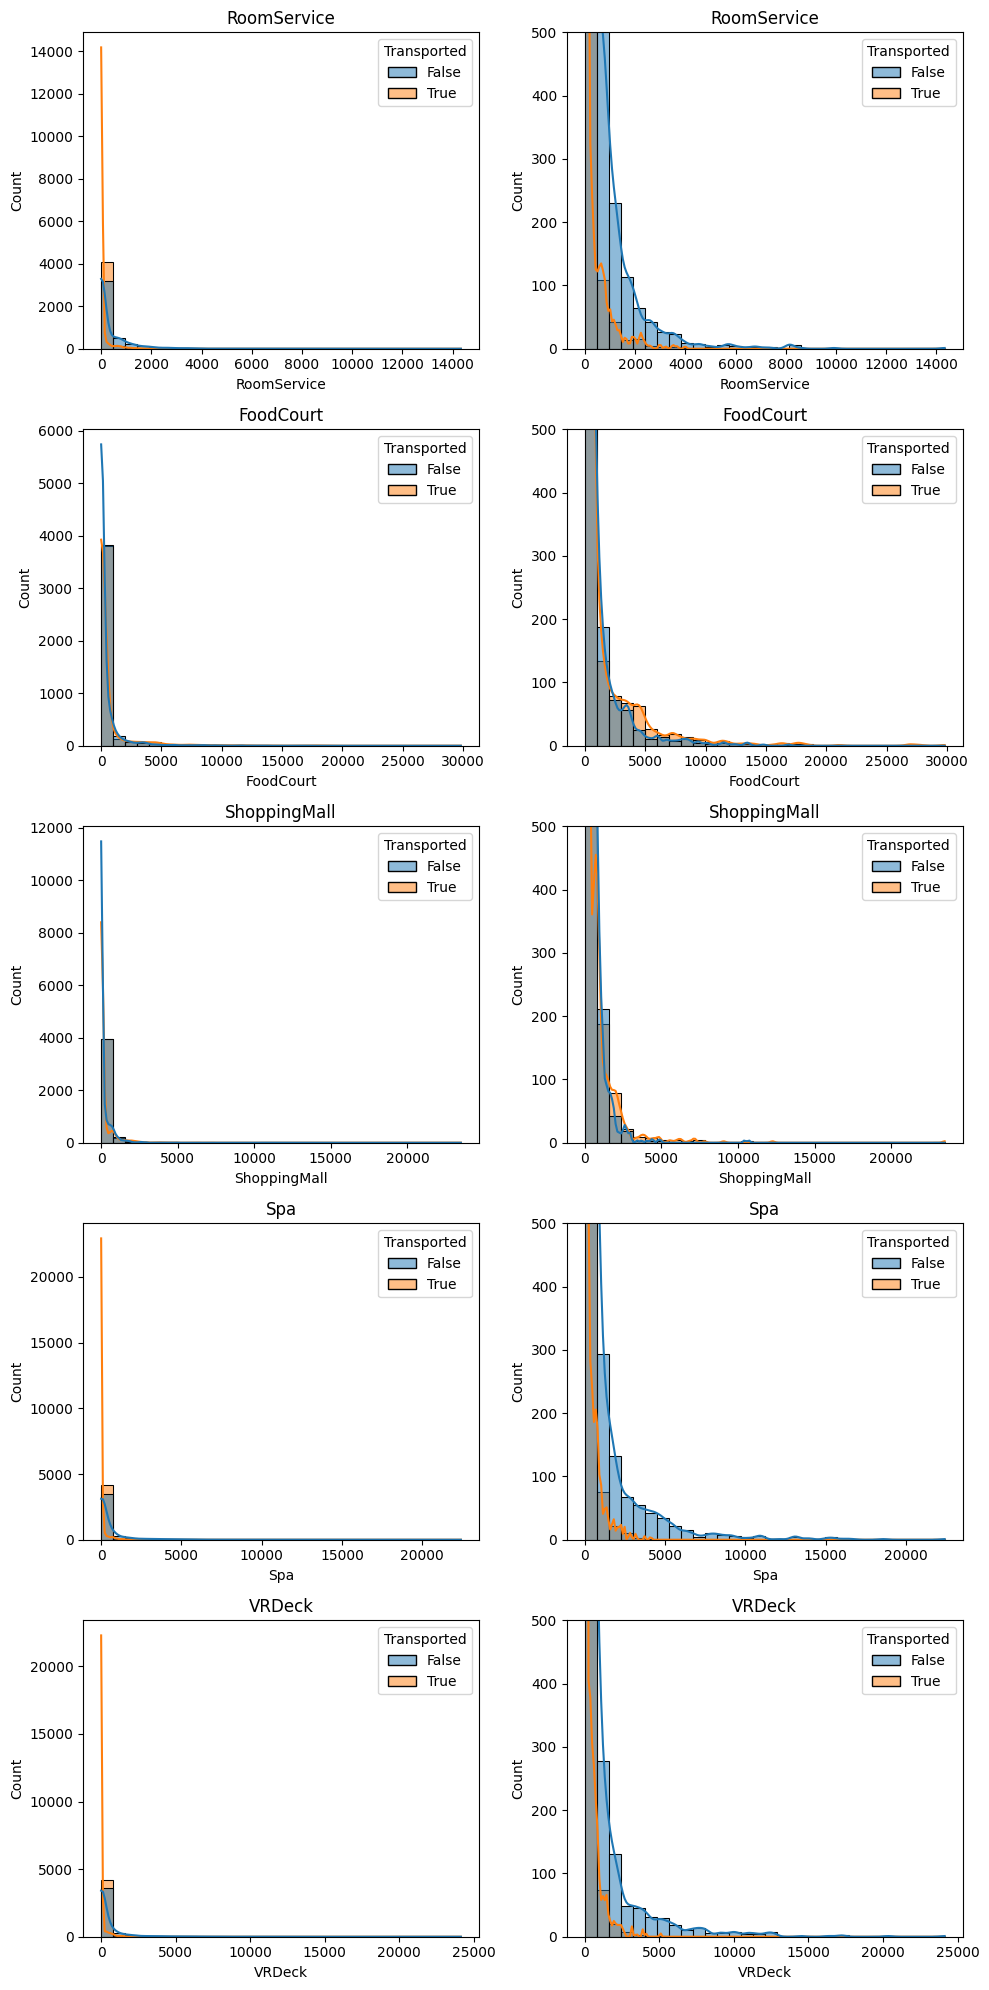

In [29]:
# 각 항목에서 보다시피, 많은 돈을 쓰지 않았다.
# expense들과 transported의 상관관계는 그리 크지 않다고 판단됨.

expense_features = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

fig = plt.figure(figsize = (10, 20))

for feature, var_name in enumerate(expense_features):
    ax = fig.add_subplot(5, 2, 2*feature+1)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    ax.set_title(var_name)

    ax = fig.add_subplot(5, 2, 2*feature+2)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,500])
    ax.set_title(var_name)
    
fig.tight_layout()
plt.show

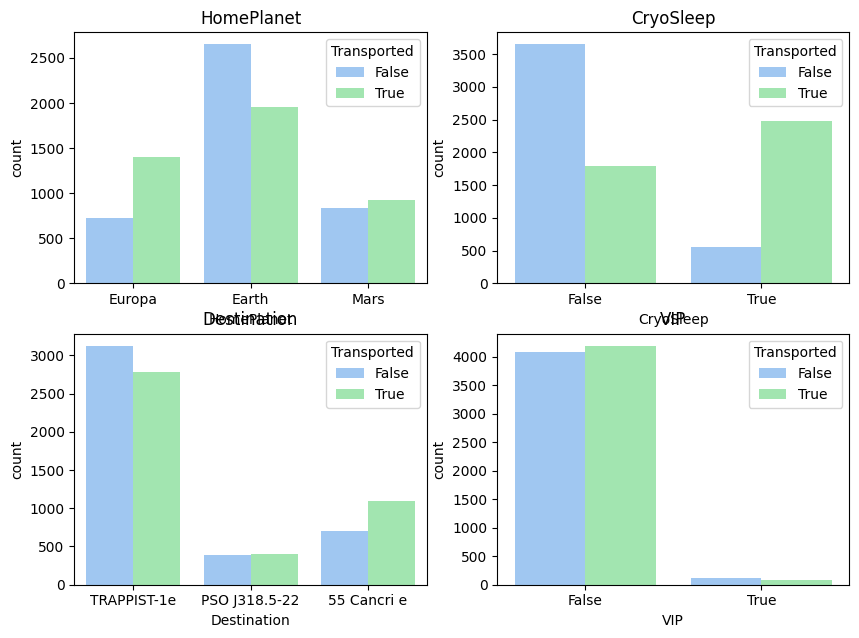

In [40]:
# cyosleep = true 일때 도착성공!! -> 유의미한 category.

state_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig = plt.figure(figsize = (10,15))

for feature, var_name in enumerate(state_features):
    ax = fig.add_subplot(4, 2, feature+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
    
plt.show()

In [41]:
# train.groupby('hour').mean()['count']
# train[train['hour_bef_temperature'].isna()]
# train['hour_bef_temperature'].fillna({934:14.788136, 1035:20.926667}, inplace = True)

In [42]:
# Handling Missing Values

Missing_features = ['HomePlanet','CryoSleep','Cabin','Destination','Age','VIP',
                    'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for feature in Missing_features:
    if feature == 'Age':
        fill = train[feature].mean()   # age missing value - mean value insert.
    else:
        fill = train[feature].value_counts().index[0]  # 왜 .index[0] ???

    # 해당 category(feature)에 정해진 'fill'값을 넣어서 missing value를 insert.
    train[feature] = train[feature].fillna(fill)
    test[feature] = test[feature].fillna(fill)

In [43]:
# Cabin - 승객이 머무르는 객실 번호. 
# Port 또는 deck/num/side 의 형식.  <<< ex: G/1496/S >>>

def extract_deck(self):
    return self.split('/')[0]

def extract_num(self):
    return self.split('/')[1]

def extract_side(self):
    return self.split('/')[2]


In [44]:
# .apply(함수) : 데이터 변환해줌.

train['Cabin_Deck'] = train['Cabin'].apply(extract_deck)
train['Cabin_Num'] = train['Cabin'].apply(extract_num)
train['Cabin_Side'] = train['Cabin'].apply(extract_side)

test['Cabin_Deck'] = test['Cabin'].apply(extract_deck)
test['Cabin_Num'] = test['Cabin'].apply(extract_num)
test['Cabin_Side'] = test['Cabin'].apply(extract_side)

In [45]:
# Convert categorical features into nuerical features.
# 카테고리형 데이터를 수치적 데이터로 변환하기

# 숫자가 아닌 object 형태의 데이터가 있다면, 수치형 데이터로 변환 후, dummies로 가변수화. -> 수치형 데이터로만 변환시 서로간의 correlation 발생.
# 가변수(Dummy variable): 독립변수를 0과 1로 변환한 변수를 의미

In [46]:
features_category = ['HomePlanet','Destination','Cabin_Deck','Cabin_Side']  # 'Cabin_Num'은 이용안함.

# pd.get_dummies( ) : 데이터 가변수화, one hot encoding.
# prefix = '  ' : one hot encoding 후, 해당 column이름을 설정.
# .columns : one hot encoding 될 column을 정해줌.

for feature in features_category:
    train[pd.get_dummies(train[feature], prefix=feature).columns] = pd.get_dummies(train[feature], prefix=feature)
    test[pd.get_dummies(test[feature], prefix=feature).columns] = pd.get_dummies(test[feature], prefix=feature)

In [47]:
# train data, test data를 합쳐서 작업위해서 pd.concat 

In [48]:
data = pd.concat([train[test.columns], test])

In [49]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_P,Cabin_Side_S
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00000,False,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00000,False,109.0,9.0,25.0,...,False,False,False,False,False,True,False,False,False,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00000,True,43.0,3576.0,0.0,...,True,False,False,False,False,False,False,False,False,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00000,False,0.0,1283.0,371.0,...,True,False,False,False,False,False,False,False,False,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00000,False,303.0,70.0,151.0,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.00000,False,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,True
4273,9269_01,Earth,False,G/734/S,TRAPPIST-1e,42.00000,False,0.0,847.0,17.0,...,False,False,False,False,False,False,True,False,False,True
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.82793,False,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,28.82793,False,0.0,2680.0,0.0,...,False,False,False,True,False,False,False,False,True,False


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                12970 non-null  object 
 1   HomePlanet                 12970 non-null  object 
 2   CryoSleep                  12970 non-null  bool   
 3   Cabin                      12970 non-null  object 
 4   Destination                12970 non-null  object 
 5   Age                        12970 non-null  float64
 6   VIP                        12970 non-null  bool   
 7   RoomService                12970 non-null  float64
 8   FoodCourt                  12970 non-null  float64
 9   ShoppingMall               12970 non-null  float64
 10  Spa                        12970 non-null  float64
 11  VRDeck                     12970 non-null  float64
 12  Name                       12676 non-null  object 
 13  Cabin_Deck                 12970 non-null  object 
 

In [ ]:
# Handling Name

In [51]:
def extract_last_name(self):
    return str(self).split()[-1]  #family name은 뒤에있으므로 공백으로 나누어서 뒤에것을 return.

data['LastName'] = data['Name'].apply(extract_last_name)

# .value_counts() : 고유값개수 counting
# .to_dict() : dictionary 형태로!
dict_names = data['LastName'].value_counts().to_dict()  

def same_name(self):
    return dict_names[self]-1

data['SameName'] = data['LastName'].apply(same_name)

In [52]:
# train, test 데이터셋에 'SameName' 넣음.

In [53]:
to_train = data.iloc[0:8693]  # original train 크기가 8693이므로.
train['SameName'] = pd.Series(to_train['SameName'])

In [54]:
to_test = data.iloc[8693:]
test['SameName'] = pd.Series(to_test['SameName'])

In [ ]:
# Handling with Age
# 10years 단위로 나누어서 보자.

In [55]:
def age_group(self):
    if self == 0:
        return -1
    elif 0 < self < 11:
        return 1
    elif 10 < self < 21:
        return 2
    elif 20 < self < 31:
        return 3
    elif 30 < self < 41:
        return 4
    elif 40 < self < 51:
        return 5
    elif 50 < self < 61:
        return 6
    elif 60 < self < 71:
        return 7    
    elif 70 < self < 81:
        return 8  
    elif 80 < self < 91:
        return 9

train['Age_Group'] = train['Age'].apply(age_group)
test['Age_Group'] = test['Age'].apply(age_group)

In [56]:
# cagegory data는 모두 나누었으므로, original column을 delete.

train.drop(['PassengerId','HomePlanet','Cabin','Destination',
               'Name','Age','Cabin_Deck','Cabin_Side'], axis = 1, inplace = True)

In [57]:
test.drop(['PassengerId','HomePlanet','Cabin','Destination',
              'Name','Age','Cabin_Deck','Cabin_Side'], axis = 1, inplace = True)

In [58]:
# Convert False to '0' and True to '1'

train['CryoSleep'] = train['CryoSleep'].astype(int)
train['VIP'] = train['VIP'].astype(int)

test['CryoSleep'] = test['CryoSleep'].astype(int)
test['VIP'] = test['VIP'].astype(int)

In [62]:
x_train = train.drop(['Transported'], axis=1)
y_train = train['Transported']

x_test = test

In [65]:
# 열의 수(columns)가 26으로 train data와 test data가 같은 것 확인.
x_train.shape, x_test.shape

((8693, 26), (4277, 26))

**Apply Models**
- RandomForest Classifier: Overfitting을 막고, Tunin을 쉽게 해주는 Classifier

In [66]:
# parameter는 내가 설정해 주어야 함.
parameters = {"n_estimators": [5, 10, 15, 20, 25], 
              "max_depth": [3, 5, 7, 9, 11, 12], 
              "min_samples_leaf" : [18, 19, 20], 
              "min_samples_split" : [8, 9, 10]}


RFC_Model = RandomForestClassifier()
RFC_grid = GridSearchCV(RFC_Model, param_grid = parameters, cv = 5, 
                        scoring = 'accuracy', n_jobs= -1)

RFC_grid.fit(x_train, y_train)

# 주어진 parameters 중에서 best accuracy를 갖는 parameter 한개씩을 찾아보자. -> Best Accuracy : 0.796
print('Best Parameters : ', RFC_grid.best_params_)
print()
print('Best Accuracy : ', RFC_grid.best_score_)

Best Parameters :  {'max_depth': 11, 'min_samples_leaf': 18, 'min_samples_split': 10, 'n_estimators': 20}

Best Accuracy :  0.7962757851257716


In [67]:
rf = RandomForestClassifier(max_depth= 12, 
                            min_samples_leaf= 20,
                            min_samples_split= 10, 
                            n_estimators= 25)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [71]:
subs = pd.read_csv('/Users/juhyeon/python-workspace/Spaceship_Titanic/sample_submission.csv')
subs

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [72]:
subs['Transported'] = y_pred_rf

In [73]:
subs

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
# DataFrame.to_csv('저장할이름.csv')
# index = False : row index 를 제외하고 저장 
# './저장할이름' : 파일이름

subs.to_csv('./Transported', index = False)

In [ ]:
### Best Accuracy :  0.7962757851257716